In [103]:
from bs4 import BeautifulSoup as bs
import requests
from collections import OrderedDict
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [104]:
url = 'https://www.imdb.com/list/ls507232408/?sort=release_date,asc&st_dt=&mode=detail&page=1'
page_source = requests.get(url)
soup = bs(page_source.content, 'lxml')

In [105]:
movies = []
movie_characters = []
movie_lengths = OrderedDict()

In [106]:
movies_dont_want = ["¿Qué pasaría si...?",
					 "Marvel de un vistazo: El consultor",
					"El caso único de Marvel: Algo divertido ocurrió de camino al martillo de Thor",
					"Marvel extendido: Artículo 47",
					"Todos aclaman al rey"]
for movie in soup.find_all('div', class_='lister-item mode-detail'):
		# Fetching title of the movie
		movie_title = movie.find('div', class_='lister-item-content').h3.a.text
		if movie_title in movies_dont_want:
			continue
		# Fetching length of the movie
		movie_length = movie.find('div', class_='lister-item-content').find('span', class_='runtime').text
		movies.append(movie_title)
		movie_lengths[movie_title] = movie_length.split(' ')[0]
		# Fetching characters in the movie
		characters = movie.find('div', class_='list-description').p.text
		movie_characters.append(characters.split('\n'))

In [107]:
data_dict = OrderedDict()
# Inputing data into the dictionary
for i in range(len(movies)):
	data_dict[movies[i]] = movie_characters[i]

In [108]:
data_dict['Spider-Man: Homecoming'][4]

'Tony Stark / Iron Man <8>'

In [109]:
data_dict['Loki'][0] = data_dict['Loki'][0].split('>')[1]+'>'

In [110]:
character_movie_time = {}
# Parsing through data scraped for each movie
for movie in data_dict.keys():
	# Parsing through each character in in the movie
	for item in data_dict[movie]:
		character = item.split('<')[0].strip()
		time = item.split('<')[1].split('>')[0].strip()
		# Adding time for each character to for each movie to the index dict
		if movie in character_movie_time.keys():
			character_movie_time[movie][character] = time
		else:
			character_movie_time[movie] = {character: time}

In [111]:
character_movie_time['Spider-Man: Homecoming']

{'Peter Parker / Spider-Man': '76:15',
 'Adrian Toomes / Vulture': '19',
 'Ned Leeds': '13:45',
 'Liz Toomes': '9:45',
 'Tony Stark / Iron Man': '8',
 'Harold "Happy" Hogan': '6',
 'Herman Schultz / The Shocker': '4:30',
 'May Parker': '4',
 'Phineas Mason / Tinkerer': '3:45',
 'Michelle Jones': '2:45',
 'Aaron Davis': '2:30',
 'Jackson Brice / The Shocker': '2:30',
 'Flash Thompson': '2:15',
 'Roger Harrington': '2',
 'Mac Gargan': '1:15',
 'Betty Brant': '1:15',
 'Ann Marie Hoag': '1',
 'Steve Rogers / Captain America': '1',
 'Jason Ionello': '1',
 'Pepper Potts': ':45',
 'Karen': 'v'}

In [112]:
char_id_index = pd.read_csv('characters.csv')
# Creating aa dict containing character IDs for each character
names = {old:new for (old, new) in zip(char_id_index['Character Name'], char_id_index['Character ID'])}
# Converting the data dict into a pandas data frame for easy handling
char_movie_matrix = pd.DataFrame(character_movie_time)
char_movie_matrix

,Iron Man,El increíble Hulk,Iron Man 2,Thor,Capitán América: El primer vengador,Los Vengadores,Iron Man 3,Marvel One-Shot: Agente Carter,Thor: El mundo oscuro,Capitán América: El Soldado de Invierno,...,Ojo de Halcón,Spider-Man: No Way Home,Caballero Luna,Doctor Strange en el multiverso de la locura,Ms. Marvel,Thor: Love and Thunder,She-Hulk: Abogada Hulka,La maldición del hombre lobo,Black Panther: Wakanda Forever,Guardianes de la Galaxia: Especial felices fiestas
Tony Stark / Iron Man,77:15,:30,61:15,NaN,NaN,31:45,62:15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pepper Potts,23:15,NaN,17:30,NaN,NaN,4:30,18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Obadiah Stane / Iron Monger,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Professor Ho Yinsen,10:45,NaN,NaN,NaN,NaN,NaN,:15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Lt. Col. James ""Rhodey"" Rhodes",8:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mining Tribe Elder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:30,NaN
U.S. Secretary of State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
Kevin Bacon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:30
Bzermiktoklok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4:45


In [113]:
char_movie_matrix['Spider-Man: Homecoming']

Tony Stark / Iron Man               8
Pepper Potts                      :45
Obadiah Stane / Iron Monger       NaN
Professor Ho Yinsen               NaN
Lt. Col. James "Rhodey" Rhodes    NaN
                                 ... 
Mining Tribe Elder                NaN
U.S. Secretary of State           NaN
Kevin Bacon                       NaN
Bzermiktoklok                     NaN
Cosmo the Space Dog               NaN
Name: Spider-Man: Homecoming, Length: 504, dtype: object

In [114]:
# Renaming characters with their character IDs
char_movie_matrix.rename(index=names, inplace=True)
char_movie_matrix

,Iron Man,El increíble Hulk,Iron Man 2,Thor,Capitán América: El primer vengador,Los Vengadores,Iron Man 3,Marvel One-Shot: Agente Carter,Thor: El mundo oscuro,Capitán América: El Soldado de Invierno,...,Ojo de Halcón,Spider-Man: No Way Home,Caballero Luna,Doctor Strange en el multiverso de la locura,Ms. Marvel,Thor: Love and Thunder,She-Hulk: Abogada Hulka,La maldición del hombre lobo,Black Panther: Wakanda Forever,Guardianes de la Galaxia: Especial felices fiestas
Tony Stark / Iron Man,77:15,:30,61:15,NaN,NaN,31:45,62:15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pepper Potts,23:15,NaN,17:30,NaN,NaN,4:30,18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Obadiah Stane,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Professor Ho Yinsen,10:45,NaN,NaN,NaN,NaN,NaN,:15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
James Rhodes / War Machine,8:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mining Tribe Elder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:30,NaN
U.S. Secretary of State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
Kevin Bacon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:30
Bzermiktoklok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4:45


In [115]:
def combine_rows(matrix):
	"""Method that combines the duplicate rows that arose due to replacing character IDs"""
	# List of characters
	characters = list(set([character for character in matrix.index]))
	# Iterating over every character
	for character in characters:
		# Creating a mini data frame for each character
		df = matrix.loc[character]
		# If the character row is present just once, iterating over every column would be iterating over every movie
		if len(list(df.index)) != len(matrix.columns):
			# Iterating over every movie for each character
			for movie in matrix.columns:
				# Initializing update value to NaN
				value = np.nan
				li = []
				# Creating a list of values for each movie
				for i in range(len(df.index)):
					li.append(str(df.iloc[i][movie]))
				# Updating the right value
				for item in li:
					if str(item) != 'nan':
						value = item
				# Updating value to the location
				matrix.loc[character, movie] = value
	# If there are n duplicates, n rows would have been created with same values; deleting the duplicates
	matrix = matrix.drop_duplicates()
	return matrix

In [116]:
# Combine rows with same index
char_movie_matrix = combine_rows(char_movie_matrix)
char_movie_matrix

,Iron Man,El increíble Hulk,Iron Man 2,Thor,Capitán América: El primer vengador,Los Vengadores,Iron Man 3,Marvel One-Shot: Agente Carter,Thor: El mundo oscuro,Capitán América: El Soldado de Invierno,...,Ojo de Halcón,Spider-Man: No Way Home,Caballero Luna,Doctor Strange en el multiverso de la locura,Ms. Marvel,Thor: Love and Thunder,She-Hulk: Abogada Hulka,La maldición del hombre lobo,Black Panther: Wakanda Forever,Guardianes de la Galaxia: Especial felices fiestas
Tony Stark / Iron Man,77:15,:30,61:15,NaN,NaN,31:45,62:15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pepper Potts,23:15,NaN,17:30,NaN,NaN,4:30,18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Obadiah Stane,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Professor Ho Yinsen,10:45,NaN,NaN,NaN,NaN,NaN,:15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
James Rhodes / War Machine,8:15,NaN,18:45,NaN,NaN,NaN,9:45,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zawavari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1:30,NaN
U.S. Secretary of State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
Kevin Bacon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:30
Bzermiktoklok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4:45


In [117]:
char_movie_matrix.index.tolist()

['Tony Stark / Iron Man',
 'Pepper Potts',
 'Obadiah Stane',
 'Professor Ho Yinsen',
 'James Rhodes / War Machine',
 'Raza',
 'Phil Coulson',
 'Christine Everhart',
 'Abu Bakaar',
 'Happy',
 'William Ginter Riva',
 'Nick Fury',
 'J.A.R.V.I.S.',
 'Hulk',
 'Dr. Betty Ross',
 'Emil Blonsky / The Abomination',
 'General Thaddeus Ross',
 'Samuel Sterns',
 'Dr. Leonard Samson',
 'Roger Harrington',
 'Ivan Vanko',
 'Justin Hammer',
 'Black Widow',
 'Senator Stern',
 'Howard Stark',
 'Anton Vanko',
 'Peter Parker / Spider-Man ',
 'Thor',
 'Loki',
 'Jane Foster',
 'Erik Selvig',
 'Odin',
 'Darcy Lewis',
 'Sif',
 'Volstagg',
 'Fandral',
 'Hogun',
 'Heimdall',
 'Laufey',
 'Frigga',
 'Agent Jasper Sitwell',
 'Hawkeye',
 'Steve Rogers',
 'Peggy Carter',
 'Red Skull',
 'Col. Chester Phillips',
 'Dr. Abraham Erskine',
 'Arnim Zola',
 'Bucky',
 'Heinz Kruger',
 'Sgt. Timothy "Dum Dum" Dugan',
 'Pvt. Gabe Jones',
 'Pvt. Jim Morita',
 'Maria Hill',
 'The Other',
 'Gen. Georgi Luchkov',
 'Councilwoman Ma

In [118]:
def convert_time_to_mins(matrix):
	"""Method that converts time of the format mm:ss or :ss or mm to minutes in float"""
	# Iterating over each character
	for character in matrix.index:
		# Iterating over each movie
		for movie in matrix.columns:
			# Current value of the cell in the matrix
			value = matrix.loc[character][movie]
			# Iterating over non NaN values only
			if str(value) != 'nan':
				# To convert strings of the format mm:ss
				if re.match(r'\d+:\d+', value):
					matrix.loc[character][movie] = float(value.split(':')[0]) + float(value.split(':')[1])/60
				# To convert strings of the format :ss
				elif re.match(r'^:\d+', value):
					matrix.loc[character][movie] = float(value.split(':')[1])/60
				# To convert strings of the format mm
				elif re.match(r'\b\d+\b(?!:)', value):
					matrix.loc[character][movie] = float(value)
				# Other formats assigned as NaN
				else:
					matrix.loc[character][movie] = np.nan
			# NaN values reassigned as NaN
			else:
				matrix.loc[character][movie] = np.nan
	return matrix

In [119]:
char_movie_matrix = convert_time_to_mins(char_movie_matrix)


In [120]:
char_movie_matrix['Total de tiempo en pantalla'] = char_movie_matrix.loc[:,:].sum(axis=1, skipna=True)

C:\Users\lache\AppData\Local\Temp\ipykernel_7280\2284275073.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:
char_movie_matrix = char_movie_matrix.sort_values(by='Total de tiempo en pantalla', ascending=False)

In [122]:
char_movie_matrix = char_movie_matrix.fillna(0)
char_movie_matrix = char_movie_matrix[char_movie_matrix['Total de tiempo en pantalla'] != 0]

C:\Users\lache\AppData\Local\Temp\ipykernel_7280\3773322732.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



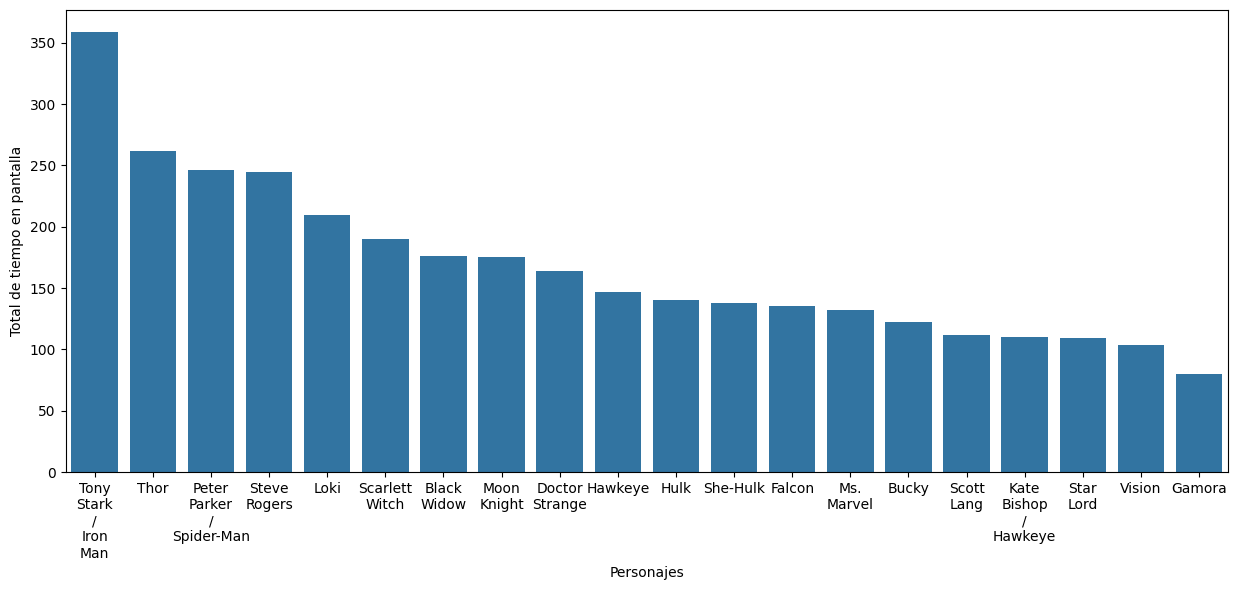

In [123]:
data = char_movie_matrix.head(20)
plt.figure(figsize=(15, 6))
data['Personajes'] = list(map(lambda x: '\n'.join(x.split(' ')),data.index))
sns.barplot(x='Personajes', y='Total de tiempo en pantalla', data=data);

In [124]:
apariciones_pj = OrderedDict()
for pj in char_movie_matrix.index:
    columnas_no_cero = char_movie_matrix.loc[pj, (char_movie_matrix.loc[pj] != 0) & (char_movie_matrix.loc[pj].apply(isinstance, args=(float,)))].index.tolist()
    apariciones_pj[pj]=columnas_no_cero[0:-1]



In [125]:
for i in apariciones_pj.keys():
    if re.match(r'.*Sara.*',i):
        print (i,apariciones_pj[i])

Sarah Wilson ['Falcon y el Soldado de Invierno']
Sarah Proctor / "Dottie" ['Bruja Escarlata y Visión']
Sara ['Doctor Strange en el multiverso de la locura']


In [126]:
from itertools import islice
ordenado_por_longitud = OrderedDict(sorted(apariciones_pj.items(), key=lambda x: len(x[1]), reverse=True))

# Mostrar el resultado
for clave, valor in islice(ordenado_por_longitud.items(), 4):
    print(f'{clave}: {(valor)}')

Tony Stark / Iron Man: ['Iron Man', 'El increíble Hulk', 'Iron Man 2', 'Los Vengadores', 'Iron Man 3', 'Vengadores: La era de Ultrón', 'Capitán América: Civil War', 'Spider-Man: Homecoming', 'Vengadores: Infinity War', 'Vengadores: Endgame', 'Spider-Man: Lejos de casa', 'Loki']
Steve Rogers: ['Capitán América: El primer vengador', 'Los Vengadores', 'Marvel One-Shot: Agente Carter', 'Capitán América: El Soldado de Invierno', 'Vengadores: La era de Ultrón', 'Ant-Man', 'Capitán América: Civil War', 'Spider-Man: Homecoming', 'Vengadores: Infinity War', 'Capitana Marvel', 'Vengadores: Endgame', 'Loki']
Black Widow: ['Iron Man 2', 'Los Vengadores', 'Capitán América: El Soldado de Invierno', 'Vengadores: La era de Ultrón', 'Capitán América: Civil War', 'Thor: Ragnarok', 'Vengadores: Infinity War', 'Capitana Marvel', 'Vengadores: Endgame', 'Loki', 'Viuda Negra']
Nick Fury: ['Iron Man', 'Iron Man 2', 'Thor', 'Capitán América: El primer vengador', 'Los Vengadores', 'Capitán América: El Soldado d

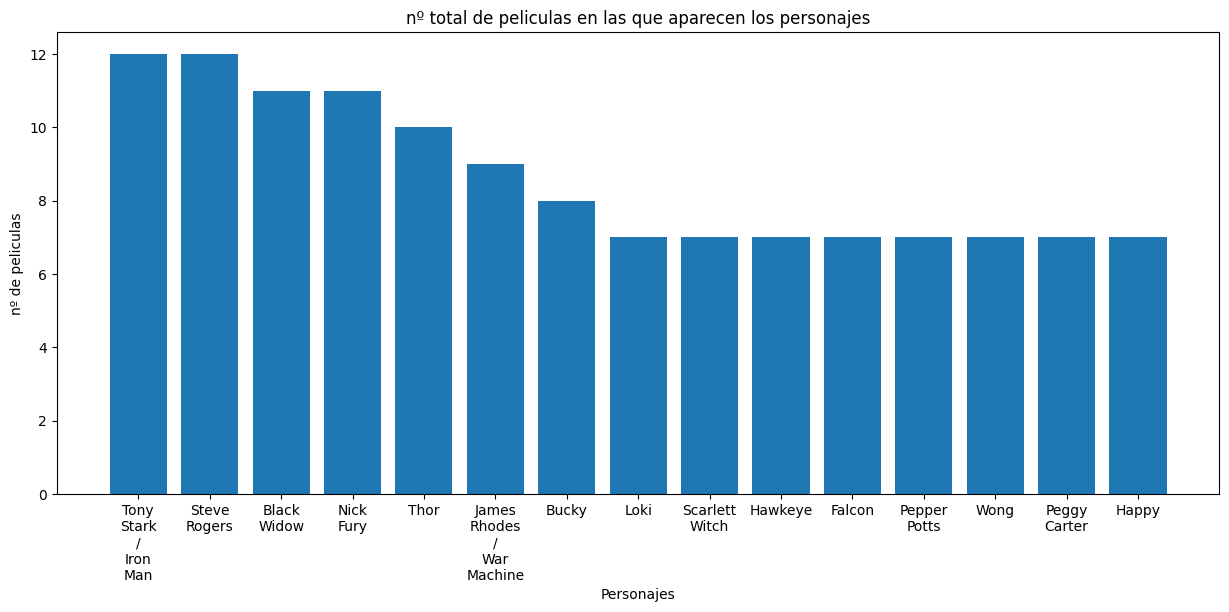

In [127]:
claves = list(ordenado_por_longitud.keys())[:15]

longitudes = [len(ordenado_por_longitud[clave]) for clave in claves]
claves = list(map(lambda x: '\n'.join(x.split(' ')),claves))

# Crear el gráfico de barras
plt.figure(figsize=(15, 6))
plt.bar(claves, longitudes)

# Añadir etiquetas y título
plt.xlabel('Personajes')
plt.ylabel('nº de peliculas')
plt.title('nº total de peliculas en las que aparecen los personajes');

In [128]:
char_movie_matrix[char_movie_matrix['Spider-Man: Homecoming'] != 0]['Spider-Man: Homecoming'].sort_values(ascending=False)

Peter Parker / Spider-Man       76.25
Vulture                         19.00
Ned Leeds                       13.75
Liz Toomes                       9.75
Tony Stark / Iron Man            8.00
Happy                            6.00
Herman Schultz / The Shocker     4.50
Aunt May                         4.00
Phineas Mason / Tinkerer         3.75
MJ                               2.75
Aaron Davis                      2.50
Flash Thompson                   2.25
Roger Harrington                 2.00
Mac Gargan                       1.25
Betty Brant                      1.25
Jason Ionello                    1.00
Steve Rogers                     1.00
Ann Marie Hoag                   1.00
Pepper Potts                     0.75
Name: Spider-Man: Homecoming, dtype: float64

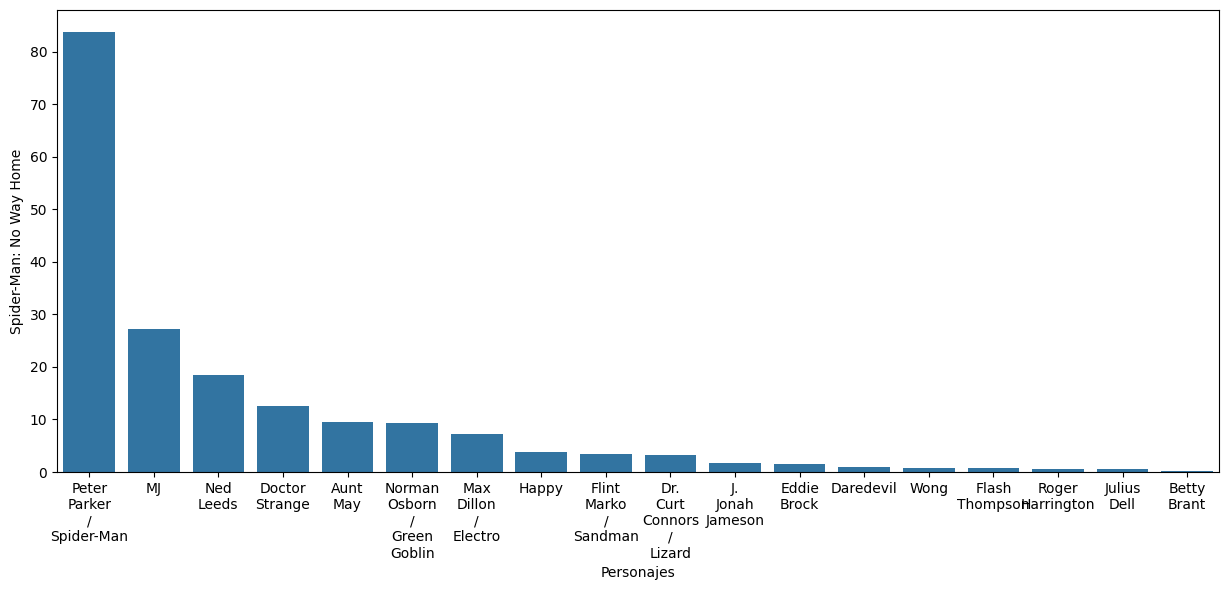

In [129]:
def grafico_char_tiempo_pelicula (pelicula):
    data = pd.DataFrame(char_movie_matrix[char_movie_matrix[pelicula] != 0][pelicula].sort_values(ascending=False))
    plt.figure(figsize=(15, 6))
    data['Personajes'] = list(map(lambda x: '\n'.join(x.split(' ')),data.index))
    sns.barplot(x='Personajes', y=pelicula, data=data)

grafico_char_tiempo_pelicula ('Spider-Man: No Way Home')


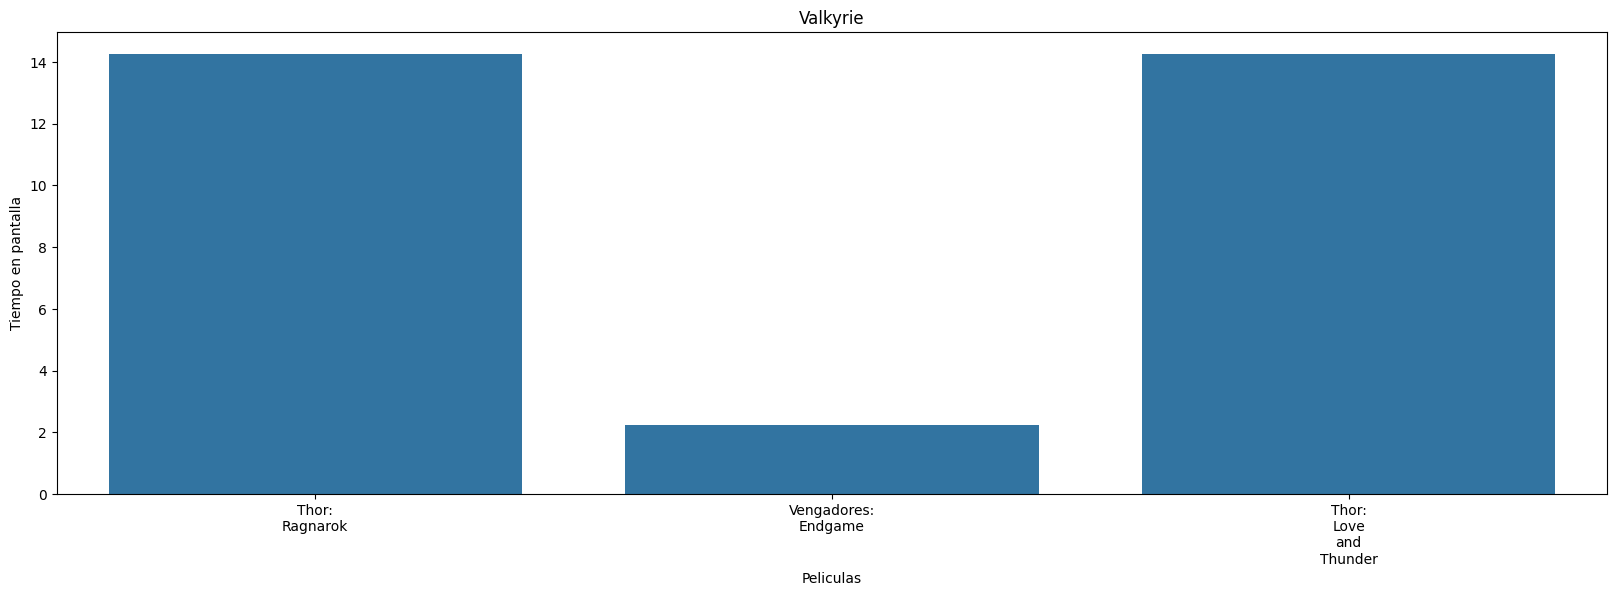

In [130]:
def grafico_peliculas_del_char (char):
    peliculas = {}
    for peli in apariciones_pj[char]:
        peliculas[peli] = char_movie_matrix.loc[char][peli]
    plt.figure(figsize=(20, 6))
    pelis = list(map(lambda x: '\n'.join(x.split(' ')),list(peliculas.keys())))
    sns.barplot(x=pelis, y=list(peliculas.values()))
    plt.title(char)
    plt.xlabel('Peliculas')
    plt.ylabel('Tiempo en pantalla');

grafico_peliculas_del_char ('Valkyrie')


In [131]:
columna_tiempo_total_peliculas_char = []
for char in char_movie_matrix.index:
    tiempo_total_peliculas_char = 0
    for peli in apariciones_pj[char]:
        tiempo_total_peliculas_char += float(movie_lengths[peli])
    columna_tiempo_total_peliculas_char.append(tiempo_total_peliculas_char)

In [132]:

columna_porcentage_tiempo_pantalla = []
suma_tiempos = list(dict(char_movie_matrix['Total de tiempo en pantalla']).values())
for i in range(len(columna_tiempo_total_peliculas_char)):
    columna_porcentage_tiempo_pantalla.append((suma_tiempos[i]/columna_tiempo_total_peliculas_char[i])*100)
columna_porcentage_tiempo_pantalla

[17.075202284626368,
 14.63687150837989,
 27.762119503945886,
 12.268170426065163,
 14.812853107344633,
 15.447154471544716,
 8.83901705115346,
 61.14982578397212,
 19.287396937573618,
 8.88317191283293,
 16.384345794392523,
 47.66435986159169,
 11.52860802732707,
 48.61623616236162,
 9.510869565217392,
 19.849023090586147,
 32.52212389380531,
 14.65863453815261,
 13.15120711562897,
 13.58603066439523,
 14.353612167300382,
 12.5,
 10.113154172560112,
 7.074036511156187,
 4.560697518443997,
 10.84,
 47.72727272727273,
 4.257565095003519,
 12.684989429175475,
 9.726962457337883,
 7.49665327978581,
 7.295850066934404,
 8.559999999999999,
 18.554006968641115,
 12.5,
 12.073170731707316,
 11.778846153846153,
 6.385135135135135,
 29.647435897435898,
 3.4065102195306585,
 8.985200845665963,
 13.588850174216027,
 5.053547523427041,
 13.745387453874539,
 12.333333333333334,
 10.285714285714285,
 3.1140350877192984,
 5.5910543130990416,
 22.115384615384613,
 5.319999999999999,
 8.042394014962593

In [133]:
nueva_fila = pd.DataFrame([movie_lengths])
nueva_fila = convert_time_to_mins(nueva_fila)
nuevo_df = (char_movie_matrix.iloc[:, :-1].div(nueva_fila.iloc[0]))*100

In [134]:
nuevo_df

,Iron Man,El increíble Hulk,Iron Man 2,Thor,Capitán América: El primer vengador,Los Vengadores,Iron Man 3,Marvel One-Shot: Agente Carter,Thor: El mundo oscuro,Capitán América: El Soldado de Invierno,...,Ojo de Halcón,Spider-Man: No Way Home,Caballero Luna,Doctor Strange en el multiverso de la locura,Ms. Marvel,Thor: Love and Thunder,She-Hulk: Abogada Hulka,La maldición del hombre lobo,Black Panther: Wakanda Forever,Guardianes de la Galaxia: Especial felices fiestas
Tony Stark / Iron Man,61.309524,0.446429,49.395161,0.0,0.0,22.202797,47.884615,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Thor,0.0,0.0,0.0,37.608696,0.0,12.587413,0.0,0.0,31.25,0.0,...,0.0,0.0,0.0,0.0,0.0,46.610169,0.0,0.0,0.0,0.0
Peter Parker / Spider-Man,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,56.587838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Steve Rogers,0.0,0.0,0.0,0.0,45.564516,19.755245,0.0,1.666667,0.0,43.382353,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Loki,0.0,0.0,0.0,18.478261,0.0,15.034965,0.0,0.0,15.625,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ulysses Bloodstone,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.961538,0.0,0.0
Daniel Drumm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.198413,0.0,0.0,0.0,0.0,0.0,0.0
Edwin Jarvis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aleta Ogord,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
def grafico_pie_porc_t_pantalla (pelicula):    
    df = nuevo_df[nuevo_df[pelicula] != 0]
    pie1 = df[pelicula]
    pie1_list = list(pie1.values)
    pie1_list = [round(each,2) for each in pie1_list]
    labels = df.index

    # Figure
    fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'pie'}]])

    fig.add_trace(
        go.Pie(
            labels=labels,
            values=pie1_list,
            textinfo='value',
            hoverinfo="label+value",
            hole=0.3,
        ),
        row=1, col=1
        
    )

    fig.update_layout(
        title="Tiempo en pantalla en " + pelicula,
        annotations=[
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": pelicula,
                "x": 0.5,
                "y": 1.06,
            }
        ],
        height=700,  # Ajusta la altura del gráfico
        width=900,   # Ajusta el ancho del gráfico
    )

    fig.show()

grafico_pie_porc_t_pantalla('Viuda Negra')